## USGS Aquifer Selection
Code to select the 25 aquifers with the highest pumping rates <br>
Link to report: https://pubs.usgs.gov/publication/cir1464 <br>
USGS principal aquifers shapefile: https://www.sciencebase.gov/catalog/item/63140610d34e36012efa385d

In [1]:
# IMPORTS
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import contextily as cx
import requests
import calendar
from importlib import reload
import mapclassify as mc

from datetime import datetime, timedelta
from shapely.geometry import Point
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

C:\Users\kondr\anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.7.0-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<module 'Src.func_ko' from 'C:\\Users\\kondr\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

### Import aquifers, lower48, and HUC2s

In [2]:
# Aquifers to plot and dataset to use
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
aq_usgs = gpd.read_file('ShapeFiles/Aquifers_USGS/us_aquifers.shp')
stream_network = gpd.read_file('ShapeFiles/Streams_US/us_streams.shp')
aq_usgs_selected_10 = gpd.read_file('ShapeFiles/Aquifers_USGS_10/Aquifers_USGS_10.shp')
aq_usgs_selected_25 = gpd.read_file('ShapeFiles/Aquifers_USGS_25/Aquifers_USGS_25.shp')
huc2 = gpd.read_file('ShapeFiles/_Master_HUC2/master_huc2.shx')

### Select 10 and 25 aquifers with highest pumping rates

In [3]:
selected_aq_list_25 = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system',
                'Columbia Plateau basaltic-rock aquifers',
                'Rio Grande aquifer system',
                'Mississippi embayment aquifer system',
                'Cambrian-Ordovician aquifer system',
                'Southeastern Coastal Plain aquifer system',
                'Biscayne aquifer',
                'Edwards-Trinity aquifer system',
                'Northern Rocky Mountains Intermontane Basins aquifer system',
                'Piedmont and Blue Ridge crystalline-rock aquifers',
                'Surficial aquifer system',
                'Valley and Ridge aquifers',
                'Silurian-Devonian aquifers',
                'Pacific Northwest basaltic-rock aquifers',
                'Willamette Lowland basin-fill aquifers',
                'Lower Cretaceous aquifers']

selected_aq_list_10 = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system']

### No longer need to run cell below since shapefiles have been created

In [73]:
# aq_usgs_selected_25 = aq_usgs.loc[aq_usgs['AQ_NAME'].isin(selected_aq_list_25)]
# aq_usgs_selected_25 = aq_usgs_selected_25.dissolve(by='AQ_NAME', as_index=False)
# aq_usgs_selected_25.to_file('ShapeFiles/Aquifers_USGS_25', driver='ESRI Shapefile')

aq_usgs_selected_10 = aq_usgs.loc[aq_usgs['AQ_NAME'].isin(selected_aq_list_10)]
aq_usgs_selected_10 = aq_usgs_selected_10.dissolve(by='AQ_NAME', as_index=False)
aq_usgs_selected_10.to_file('ShapeFiles/Aquifers_USGS_10', driver='ESRI Shapefile')

### Plot aquifers and lower48

In [4]:
show_huc4 = False
show_gauges = False
# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = True
overwrite = True
# True if you want a context basemap (adds runtime)
basemap = False

In [19]:
aq_list_25 = aq_usgs_selected_25['AQ_NAME'].tolist()
color_names_25 = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink',
               'teal', 'lavender', 'brown', 'black', 'maroon', 'lightblue', 'coral', 'olive', 'navy', 'lightgreen',
              'turquoise', 'gold', 'skyblue', 'violet', 'salmon']
colors_by_name_25 = [mcolors.CSS4_COLORS[name] for name in color_names_25]
colors_dict_25 = dict(zip(aq_list_25, colors_by_name_25))

aq_list_10 = aq_usgs_selected_10['AQ_NAME'].tolist()
color_names_10 = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink']
#color_names_10 = ['darkorange', 'lightgreen', 'tomato', 'yellow', 'orange', 
#                  'red', 'orangered', 'limegreen', 'forestgreen', 'gold']
colors_by_name_10 = [mcolors.CSS4_COLORS[name] for name in color_names_10]
colors_dict_10 = dict(zip(selected_aq_list_10 , colors_by_name_10))

In [16]:
colors_dict_10

{'Basin and Range basin-fill aquifers': '#FF0000',
 'California Coastal Basin aquifers': '#0000FF',
 'Central Valley aquifer system': '#008000',
 'Coastal lowlands aquifer system': '#FFFF00',
 'Floridan aquifer system': '#FFA500',
 'High Plains aquifer': '#800080',
 'Mississippi River Valley alluvial aquifer': '#00FFFF',
 'Northern Atlantic Coastal Plain aquifer system': '#FF00FF',
 'Pacific Northwest basin-fill aquifers': '#00FF00',
 'Snake River Plain basaltic-rock aquifers': '#FFC0CB'}

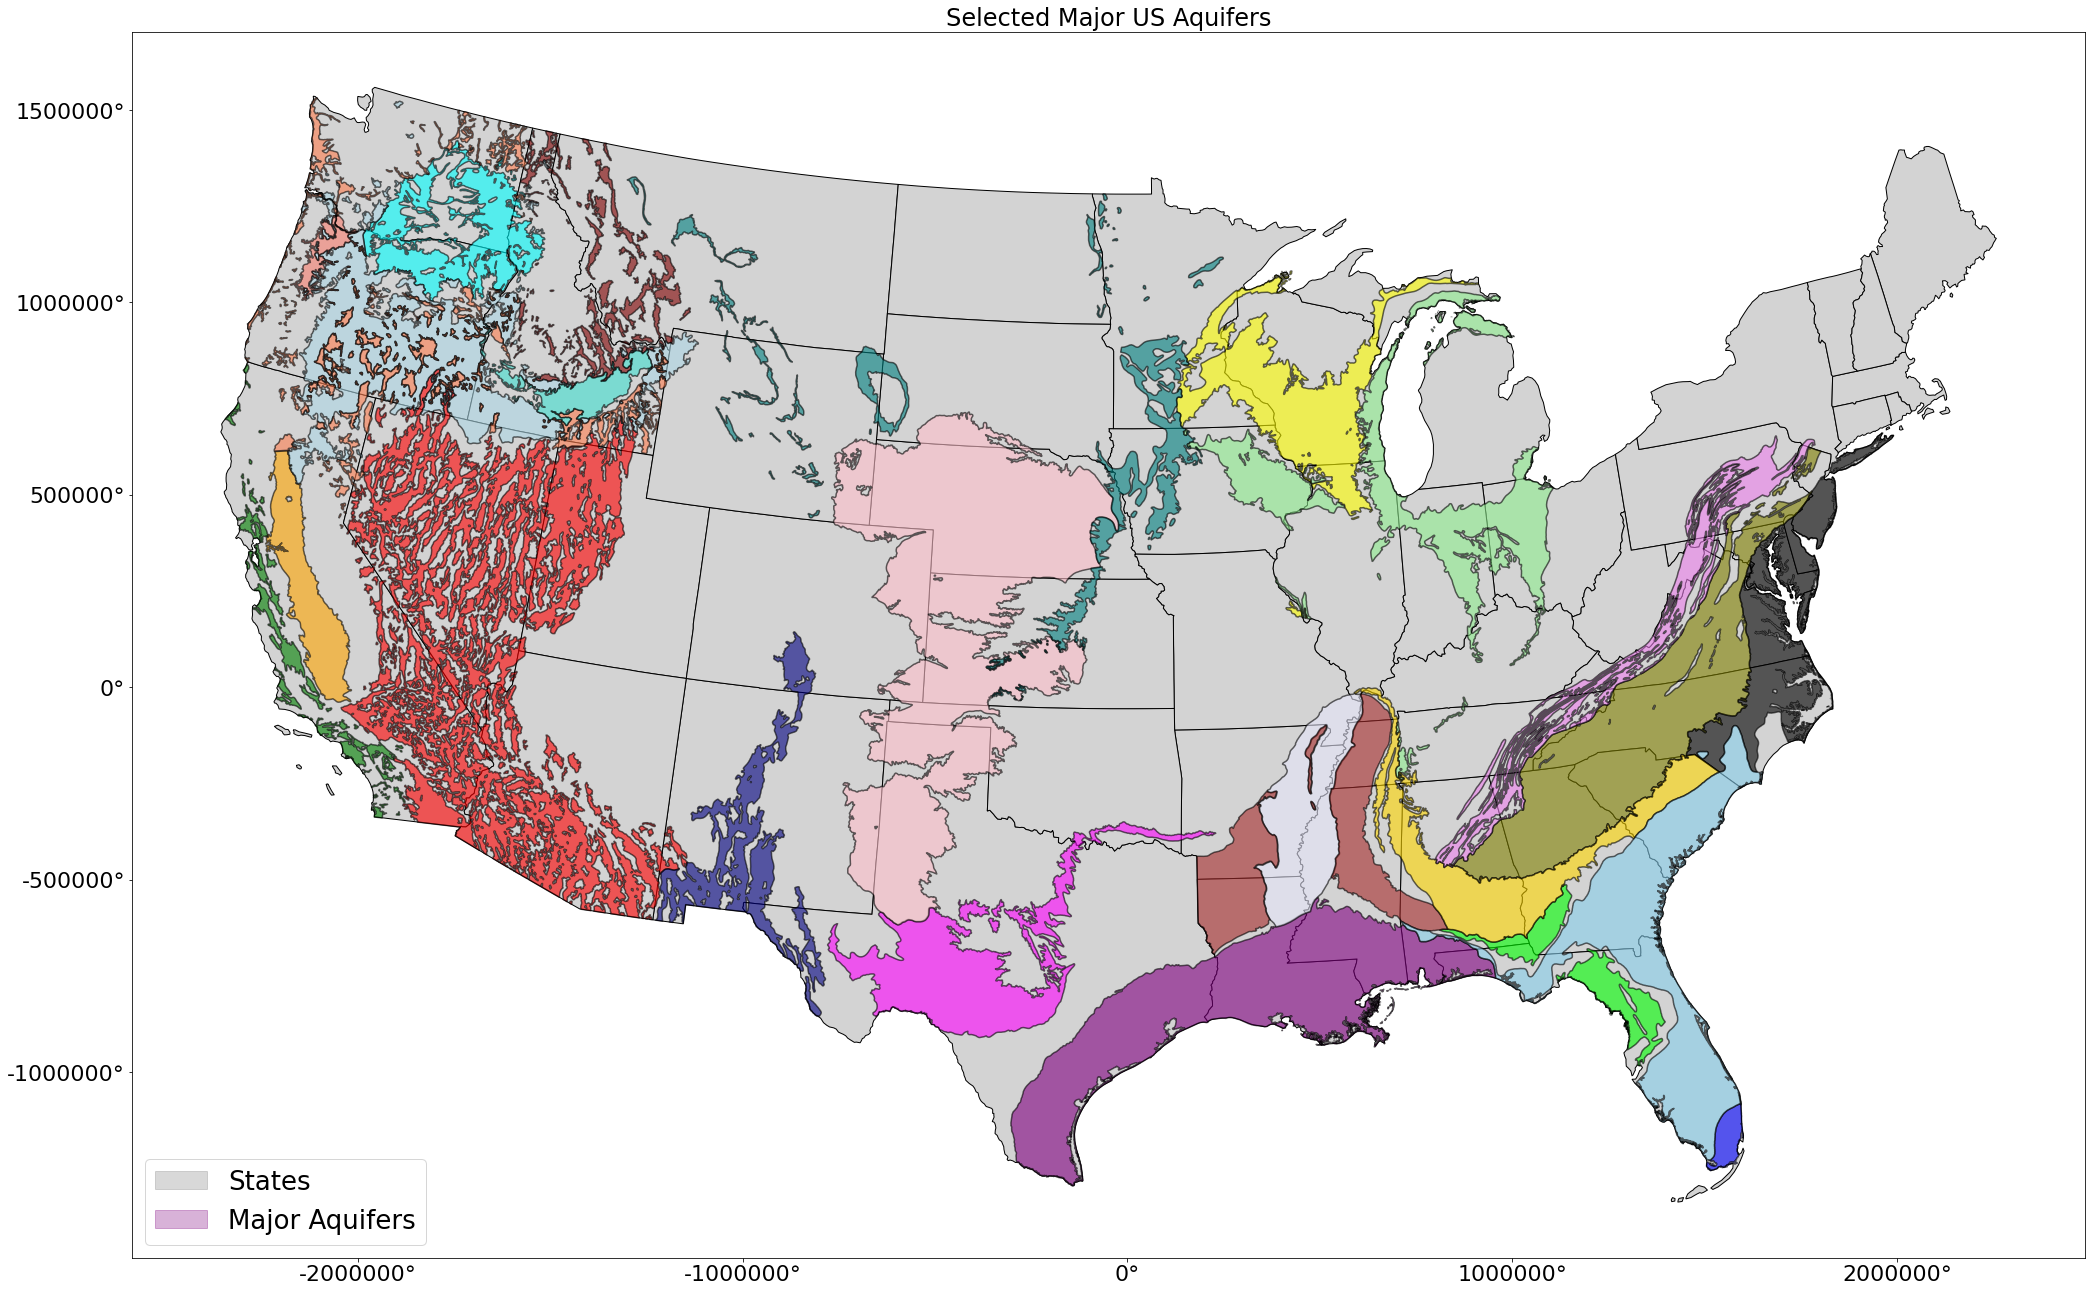

In [6]:
fig, ax = plt.subplots(figsize=(35, 35))
#plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)
plt.title(f'Selected Major US Aquifers', fontsize=24)

# Lower-48 Plot
if not basemap:       
    #lower48 = lower48.to_crs(epsg=4269)
    lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0)  
    
# Plot counties
#counties_us = counties_us.to_crs(epsg=4269)
#counties_us = counties_us.to_crs('ESRI:102003')
#counties_plot = counties_us.plot(ax=ax, edgecolor='white', facecolor='none', alpha = 0.5, legend=True)

#aq_usgs_selected_25 = aq_usgs_selected_25.to_crs(epsg=4269)
aq_usgs_selected_25 = aq_usgs_selected_25.to_crs('ESRI:102003')
for aq, color in colors_dict_25.items():
    aq_usgs_selected_25[aq_usgs_selected_25['AQ_NAME'] == aq].plot(ax=ax, edgecolor='black', color=color, linewidth=1.5, alpha=0.6)
#aq_usgs_selected.plot(ax=ax, edgecolor='black', facecolor='purple', linewidth=1.5, alpha=0.2)

if show_huc4:
    for aq in aquifers:
        fn.plot_huc4(ax, huc4_shape, codes=aq.huc4s)
        
# Plot streams
#streams_plot = streams.plot(ax=ax, edgecolor='blue', facecolor='blue', alpha = 0.5, legend=True)

if basemap:
    fn.plot_basemap(ax)
    
# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='grey', alpha=0.3), 
                Patch(color='purple', alpha=0.3)])  # Add the handle for legend
labels.extend(['States', 'Major Aquifers'])  # Add the label for legend
#legend = ax.get_legend()
ax.legend(handles, labels, loc='lower left', fontsize=26)

ax.tick_params(axis='both', which='major', labelsize=22)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
#ax.axis("off")

# Save images if they don't exist or if overwrite is True
if save_img:
    img_path = f'Saved_Visuals/Aquifers/aquifer_map_25.png'
    fn.save_plot_as_image(img_path, overwrite)    

In [7]:
aq_usgs_selected_10
gw_pumping_mgd = {'Basin and Range basin-fill aquifers': 7389.83,
              'California Coastal Basin aquifers': 2033.51,
              'Central Valley aquifer system': 11116.8,
              'Coastal lowlands aquifer system': 2287.96,
              'Floridan aquifer system': 3184.94,
              'High Plains aquifer': 12300.91,
              'Mississippi River Valley alluvial aquifer': 12141.03,
              'Northern Atlantic Coastal Plain aquifer system': 1344.63,
              'Pacific Northwest basin-fill aquifers': 1390.8,
              'Snake River Plain basaltic-rock aquifers': 2928.81}

colors = {'Basin and Range basin-fill aquifers': 'darkorange',
              'California Coastal Basin aquifers': 'lightgreen',
              'Central Valley aquifer system': 'tomato',
              'Coastal lowlands aquifer system': 'yellow',
              'Floridan aquifer system': 'orange',
              'High Plains aquifer': 'red',
              'Mississippi River Valley alluvial aquifer': 'orangered',
              'Northern Atlantic Coastal Plain aquifer system': 'limegreen',
              'Pacific Northwest basin-fill aquifers': 'forestgreen',
              'Snake River Plain basaltic-rock aquifers': 'gold'}

color_names_10 = ['darkorange', 'lightgreen', 'tomato', 'yellow', 'orange', 
                  'red', 'orangered', 'limegreen', 'forestgreen', 'gold']

aq_usgs_selected_10['gw_pumping_mgd'] = aq_usgs_selected_10['AQ_NAME'].map(gw_pumping_mgd)
#aq_usgs_selected_10

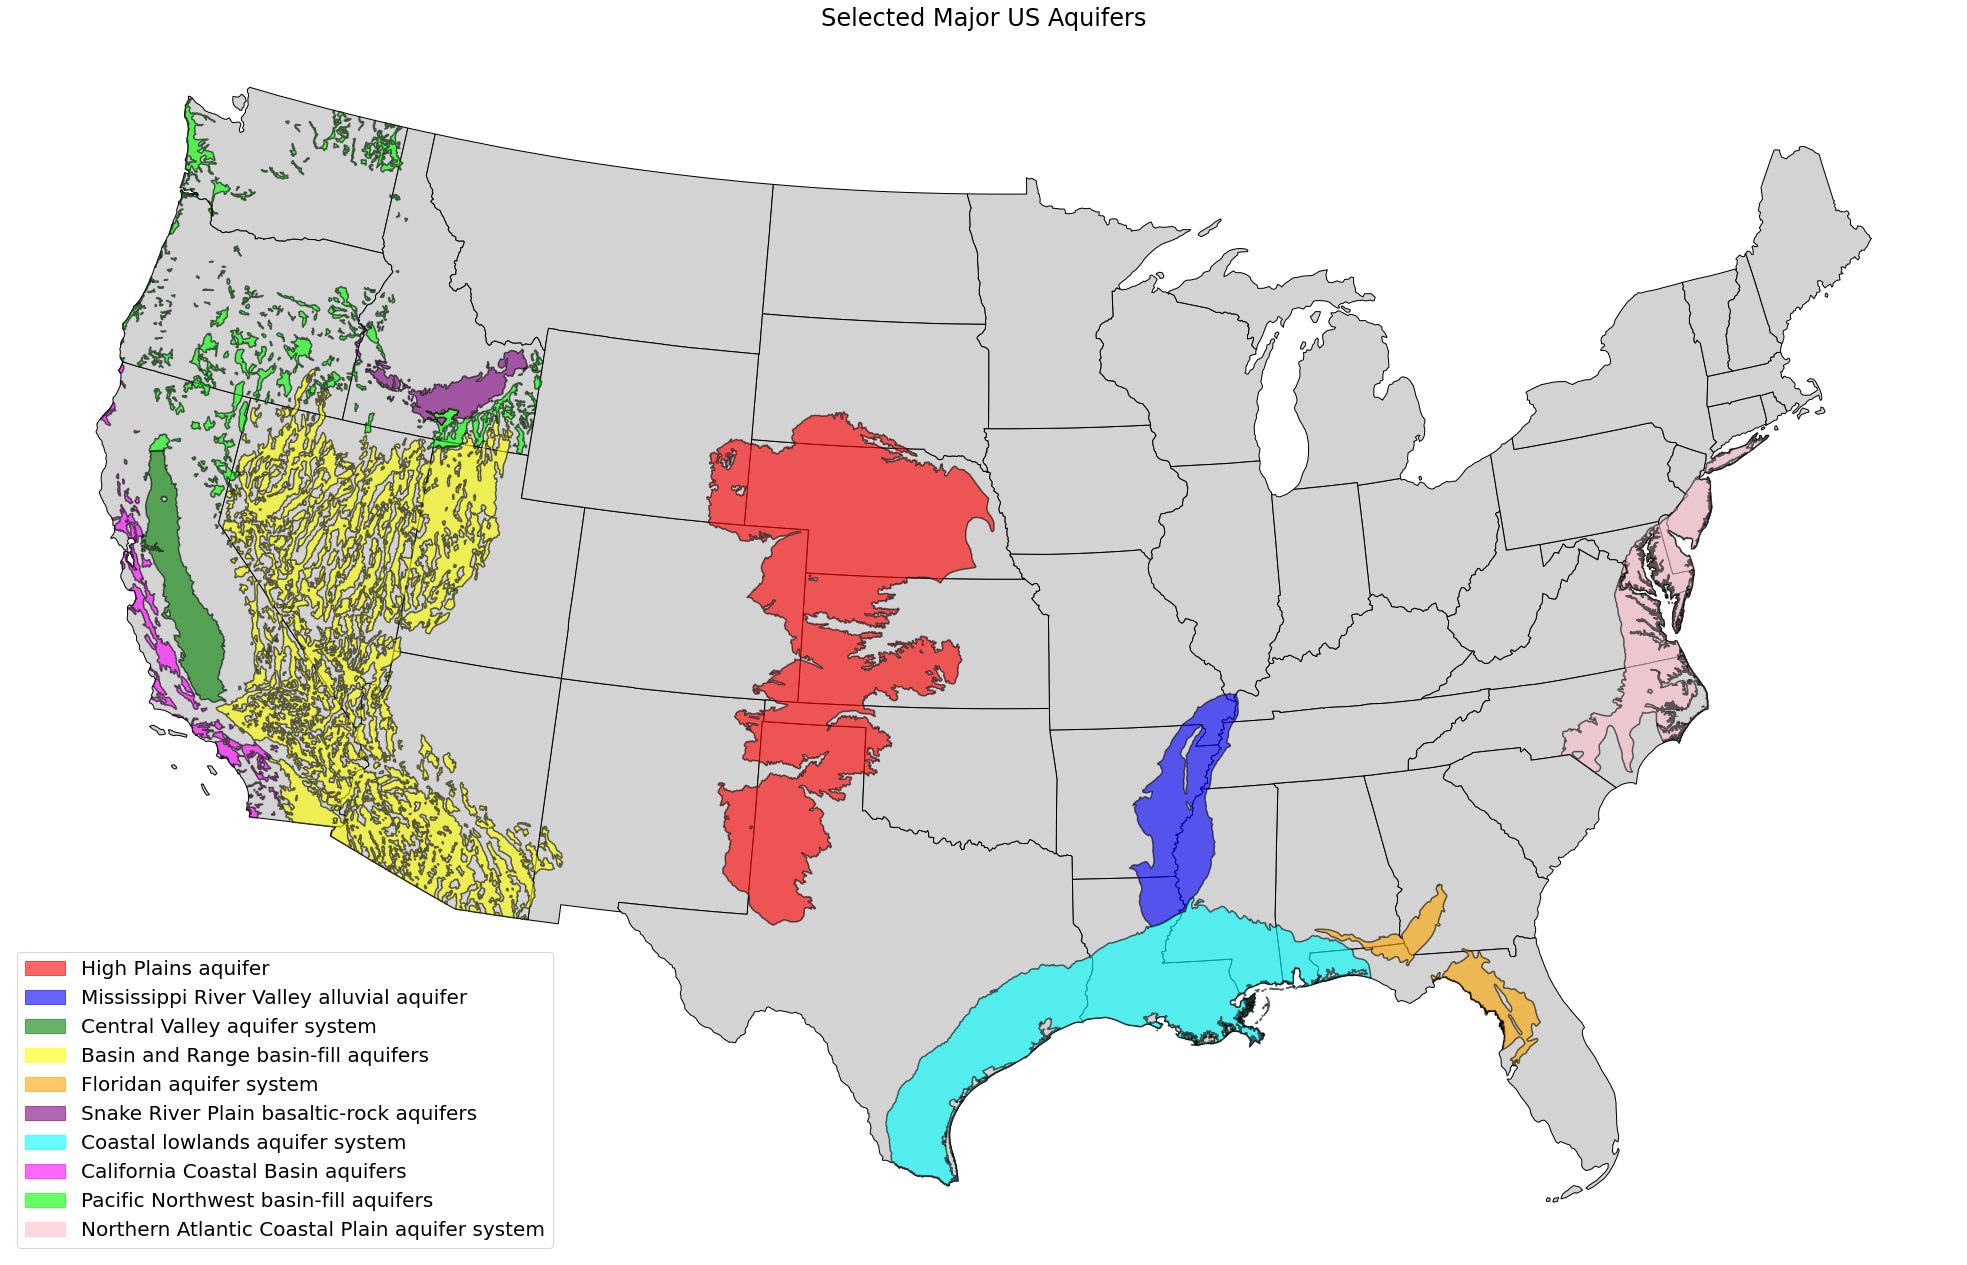

In [20]:
import adjustText as aT

fig, ax = plt.subplots(figsize=(35, 35))
#plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)
plt.title(f'Selected Major US Aquifers', fontsize=24)

# Lower-48 Plot
if not basemap:       
    #lower48 = lower48.to_crs(epsg=4269)
    lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0)  
    
#fn.plot_stream_network(stream_network, ax, zorder=2, alpha=0.70)
    
# Plot counties
#counties_us = counties_us.to_crs(epsg=4269)
#counties_us = counties_us.to_crs('ESRI:102003')
#counties_plot = counties_us.plot(ax=ax, edgecolor='white', facecolor='none', alpha = 0.5, legend=True)

#aq_usgs_selected_10 = aq_usgs_selected_25.to_crs(epsg=4269)
aq_usgs_selected_10 = aq_usgs_selected_10.to_crs('ESRI:102003')
for aq, color in colors_dict_10.items():
    aq_usgs_selected_10[aq_usgs_selected_10['AQ_NAME'] == aq].plot(ax=ax, color=color, edgecolor='black', linewidth=1.5, alpha=0.6)
    
#aq_usgs_selected.plot(ax=ax, edgecolor='black', facecolor='purple', linewidth=1.5, alpha=0.2)

# aq_usgs_selected_10.plot(ax=ax, column='gw_pumping_mgd', cmap='OrRd', linewidth=1.5, alpha=0.6, legend=True,
#                         legend_kwds={"label": "Groundwater Withdrawls (MGD)", "orientation": "horizontal", "shrink":.8})

# cb_ax = fig.axes[1] 
# cb_ax.tick_params(labelsize=40)
# cb_ax.set_xlabel('Groundwater Withdrawals (MGD)', fontsize=40) 

aq_usgs_selected_10["center"] = aq_usgs_selected_10["geometry"].centroid
aq_usgs_selected_10_pts = aq_usgs_selected_10.copy()
aq_usgs_selected_10_pts.set_geometry("center", inplace = True)

texts = []

#for x, y, label in zip(aq_usgs_selected_10_pts.geometry.x, aq_usgs_selected_10_pts.geometry.y, aq_usgs_selected_10_pts["AQ_NAME"]):
#    texts.append(plt.text(x, y+10, label, fontsize = 30))

#aT.adjust_text(texts, force_points=0.6, force_text=1.0)# expand_points=(1,1), expand_text=(1,1))
               #arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))


if show_huc4:
    for aq in aquifers:
        fn.plot_huc4(ax, huc4_shape, codes=aq.huc4s)
        
# Plot streams
#streams_plot = streams.plot(ax=ax, edgecolor='blue', facecolor='blue', alpha = 0.5, legend=True)

if basemap:
    fn.plot_basemap(ax)
    
# Plot legend
aq_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'lime', 'pink']
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color=aq_colors[0], alpha=0.6), 
                Patch(color=aq_colors[1], alpha=0.6),
                Patch(color=aq_colors[2], alpha=0.6),
                Patch(color=aq_colors[3], alpha=0.6),
                Patch(color=aq_colors[4], alpha=0.6),
                Patch(color=aq_colors[5], alpha=0.6),
                Patch(color=aq_colors[6], alpha=0.6),
                Patch(color=aq_colors[7], alpha=0.6),
                Patch(color=aq_colors[8], alpha=0.6),
                Patch(color=aq_colors[9], alpha=0.6)])  # Add the handle for legend

labels.extend(['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system'])  # Add the label for legend
#legend = ax.get_legend()
ax.legend(handles, labels, loc='lower left', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=22)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
ax.axis("off")

# Save images if they don't exist or if overwrite is True
if save_img:
    img_path = f'Saved_Visuals/Aquifers/aquifer_map_10_multicolor.png'
    fn.save_plot_as_image(img_path, overwrite) 

## HUC2 Watersheds

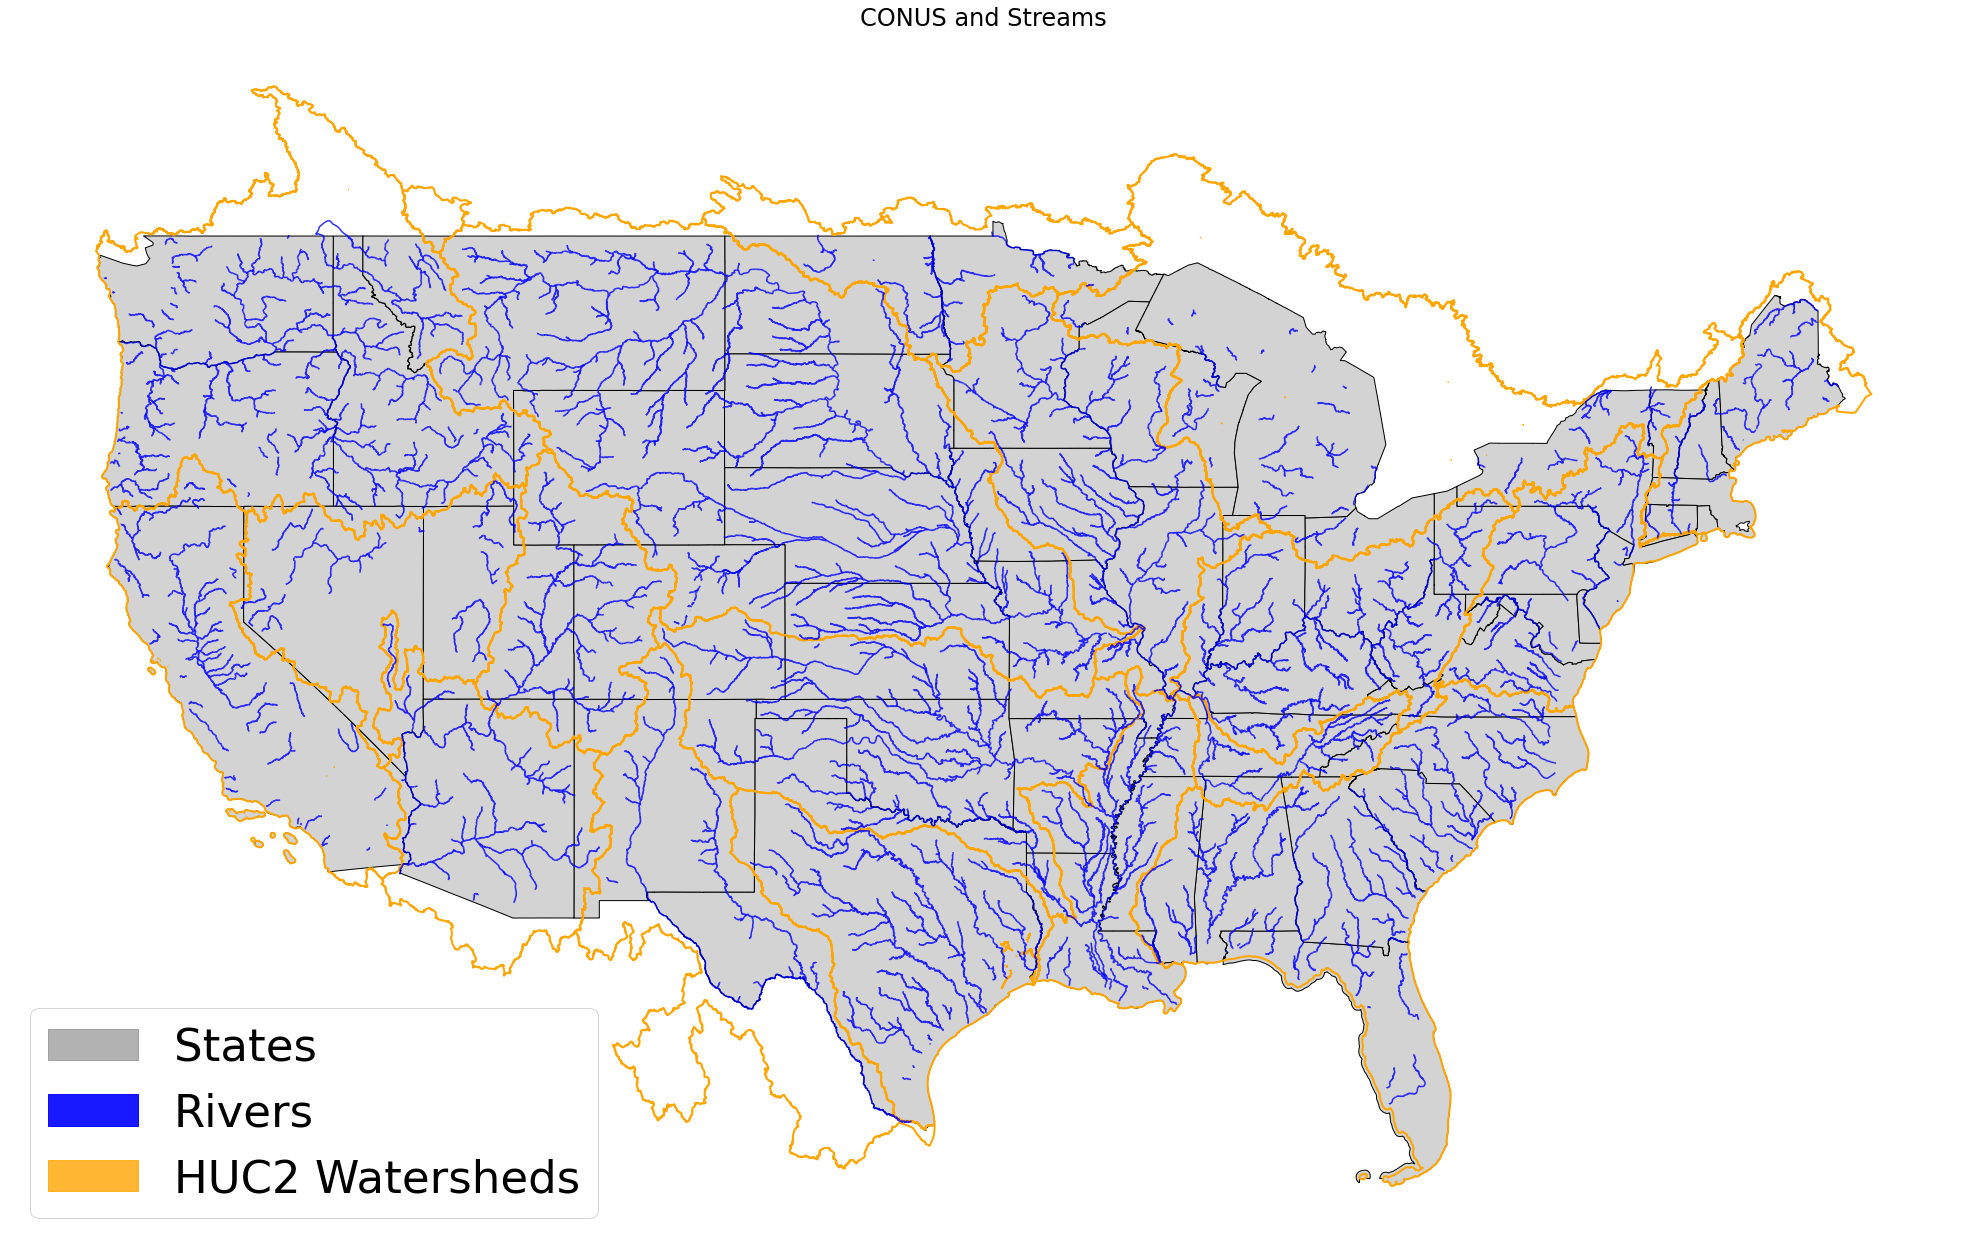

In [94]:
fig, ax = plt.subplots(figsize=(35, 35))
#plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)
plt.title(f'CONUS and Streams', fontsize=24)

# Lower-48 Plot
if not basemap:       
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0)  
    
stream_network.plot(ax=ax, color='blue', linewidth=1.5, alpha=0.8, zorder=2)

huc2 = huc2.to_crs(epsg=4269)
huc2.plot(ax=ax, edgecolor='orange', facecolor='none', linewidth=2.0) 
    
# Plot counties
#counties_us = counties_us.to_crs(epsg=4269)
#counties_us = counties_us.to_crs('ESRI:102003')
#counties_plot = counties_us.plot(ax=ax, edgecolor='white', facecolor='none', alpha = 0.5, legend=True)

        
# Plot streams
#streams_plot = streams.plot(ax=ax, edgecolor='blue', facecolor='blue', alpha = 0.5, legend=True)
    
# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='grey', alpha=0.6), 
                Patch(color='blue', alpha=0.9),
                Patch(color='orange', alpha=0.8)])  # Add the handle for legend
labels.extend(['States',
               'Rivers',
               'HUC2 Watersheds'])  # Add the label for legend
legend = ax.get_legend()
ax.legend(handles, labels, loc='lower left', fontsize=45)

ax.tick_params(axis='both', which='major', labelsize=22)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: '{:.0f}°'.format(val)))
ax.axis("off")

# Save images if they don't exist or if overwrite is True
if save_img:
    img_path = f'Saved_Visuals/us_streams_huc2.png'
    fn.save_plot_as_image(img_path, overwrite) 

In [9]:
dict(zip(aq_list_25, color_names_25))

{'Basin and Range basin-fill aquifers': 'red',
 'Biscayne aquifer': 'blue',
 'California Coastal Basin aquifers': 'green',
 'Cambrian-Ordovician aquifer system': 'yellow',
 'Central Valley aquifer system': 'orange',
 'Coastal lowlands aquifer system': 'purple',
 'Columbia Plateau basaltic-rock aquifers': 'cyan',
 'Edwards-Trinity aquifer system': 'magenta',
 'Floridan aquifer system': 'lime',
 'High Plains aquifer': 'pink',
 'Lower Cretaceous aquifers': 'teal',
 'Mississippi River Valley alluvial aquifer': 'lavender',
 'Mississippi embayment aquifer system': 'brown',
 'Northern Atlantic Coastal Plain aquifer system': 'black',
 'Northern Rocky Mountains Intermontane Basins aquifer system': 'maroon',
 'Pacific Northwest basaltic-rock aquifers': 'lightblue',
 'Pacific Northwest basin-fill aquifers': 'coral',
 'Piedmont and Blue Ridge crystalline-rock aquifers': 'olive',
 'Rio Grande aquifer system': 'navy',
 'Silurian-Devonian aquifers': 'lightgreen',
 'Snake River Plain basaltic-rock aqu

In [10]:
dict(zip(aq_list_10, color_names_10))

{'Basin and Range basin-fill aquifers': 'red',
 'California Coastal Basin aquifers': 'blue',
 'Central Valley aquifer system': 'green',
 'Coastal lowlands aquifer system': 'yellow',
 'Floridan aquifer system': 'orange',
 'High Plains aquifer': 'purple',
 'Mississippi River Valley alluvial aquifer': 'cyan',
 'Northern Atlantic Coastal Plain aquifer system': 'magenta',
 'Pacific Northwest basin-fill aquifers': 'lime',
 'Snake River Plain basaltic-rock aquifers': 'pink'}